<a href="https://colab.research.google.com/github/Cazzarooo/YOLO_TREINO/blob/main/YOLO_Inicial_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**YOLOv8** é um novo modelo de visão computacional de última geração construído pela Ultralytics. O modelo YOLOv8 contém suporte pronto para uso para tarefas de detecção, classificação e segmentação de objetos, acessível por meio de um pacote Python, bem como uma interface de linha de comando.

Fonte: https://yolov8.com/



Documentação e modelos do YOLOv8:

https://github.com/ultralytics/ultralytics



Sugestão de leitura:

https://iaexpert.academy/2020/10/13/deteccao-de-objetos-com-yolo-uma-abordagem-moderna/?doing_wp_cron=1696367994.9827990531921386718750

Instalação dos pacotes e das bibliotecas do YOLOv8

In [1]:
# Instalando a biblioteca do YOLOv8
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 6.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [2]:
# Importando o pacote ultralytics
import ultralytics

In [3]:
# Importando o pacote Pytorch
# Documentação: https://pytorch.org/

import torch

In [4]:
# Importando as demais bibliotecas
import cv2
from google.colab.patches import cv2_imshow

## Realizando a detecção

A forma mais rápida de executar a deteçcão é através da CLI, conforme pode ver abaixo a sintaxe.

Os parâmetros:
* **task** - tarefa, podendo ser detecção, segmentação ou classificação
* **model** - o modelo que queremos usar. São disponibilizados 5 modelos: YOLOv8n (nano), YOLOv8s (small), YOLOv8m (medium), YOLOv8l (large), YOLOv8x (extra large). Nano é o mais rápido e o menor (menos pesado para rodar), enquanto que o Extra Large (YOLOv8x) é o mais preciso porém mais pesado para rodar, portanto será mais lento.
  Para o valor desse parâmetro, basta informar o nome e ao lado .pt pois é a extensão do modelo treinado em pytorch.

* **mode** - basicamente é o que queremos com o comando. Queremos fazer a detecção/inferência/predição, portanto deixe =predict. Valores aceitos: [train, val, predict, export]

* **conf** - o limiar (threshold) que usaremos para filtrar detecções "fracas". Se a confiança estiver abaixo desse valor, não será considerada. Por padrão podemos configurar com um limiar bem baixo (ex: 0.25) e depois aumentar, caso verifique que detectou incorretamente algum objeto.  
* **source** - a imagem ou vídeo que queremos fazer a detecção.

In [5]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/content/person.jpg' save=True

100% 6.23M/6.23M [00:00<00:00, 124MB/s]
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/person.jpg: 448x640 1 person, 1 dog, 1 horse, 425.1ms
Speed: 7.2ms preprocess, 425.1ms inference, 3317.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


**Importante:**
- Observe na saída da célula acima que o resultado da detecção será salvo na pasta 'runs/detect/predict/'
- Atenção ao número do 'predict' gerado para passar corretamente o nome na célula abaixo.

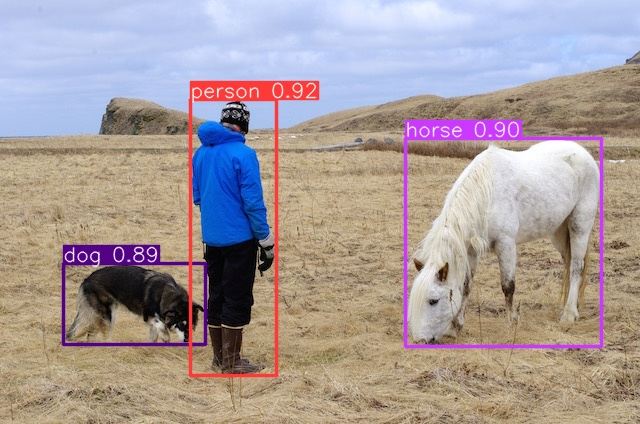

In [6]:
resultado = cv2.imread('/content/runs/detect/predict/person.jpg')
cv2_imshow(resultado)

In [7]:
# Detecção a partir de arquivo externo:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://ultralytics.com/images/zidane.jpg' save=True

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 165k/165k [00:00<00:00, 10.2MB/s]
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 110.7ms
Speed: 11.2ms preprocess, 110.7ms inference, 2308.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


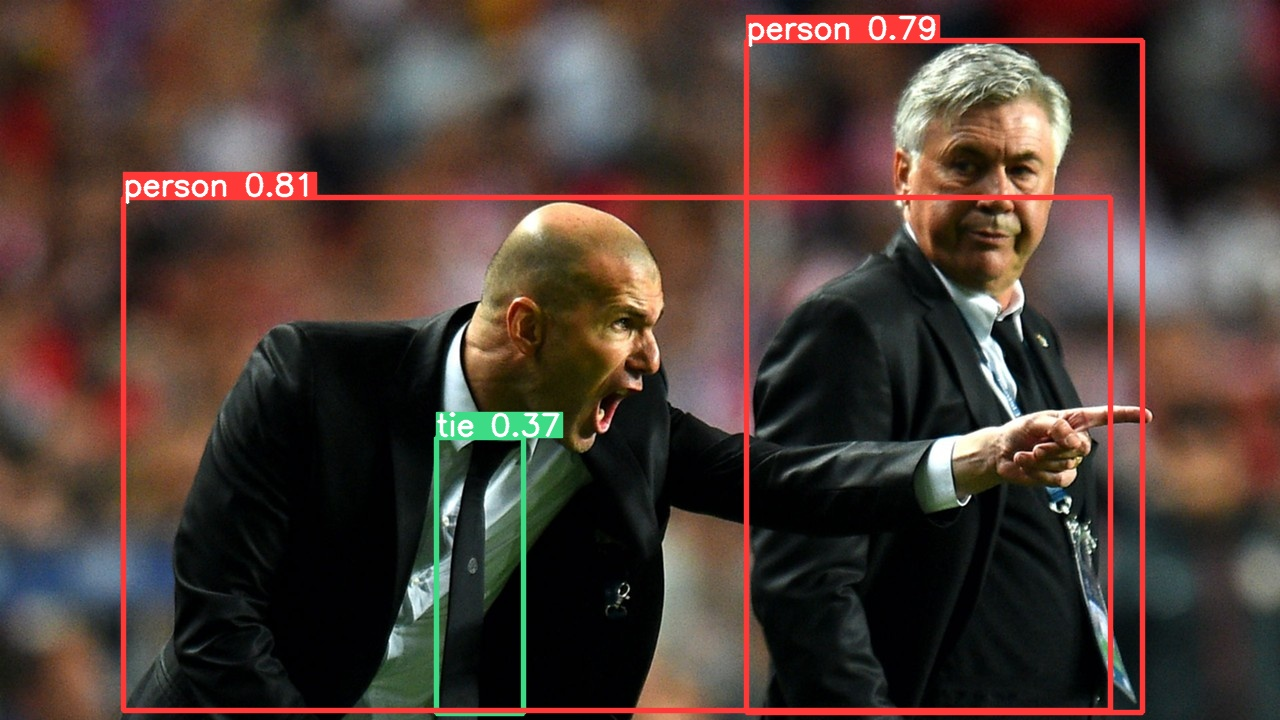

In [8]:
resultado = cv2.imread('/content/runs/detect/predict2/zidane.jpg')
cv2_imshow(resultado)

In [9]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.4 source='italia.jpg' save=True

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/italia.jpg: 512x640 11 persons, 1 bicycle, 1 handbag, 3 clocks, 197.3ms
Speed: 10.9ms preprocess, 197.3ms inference, 2204.3ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


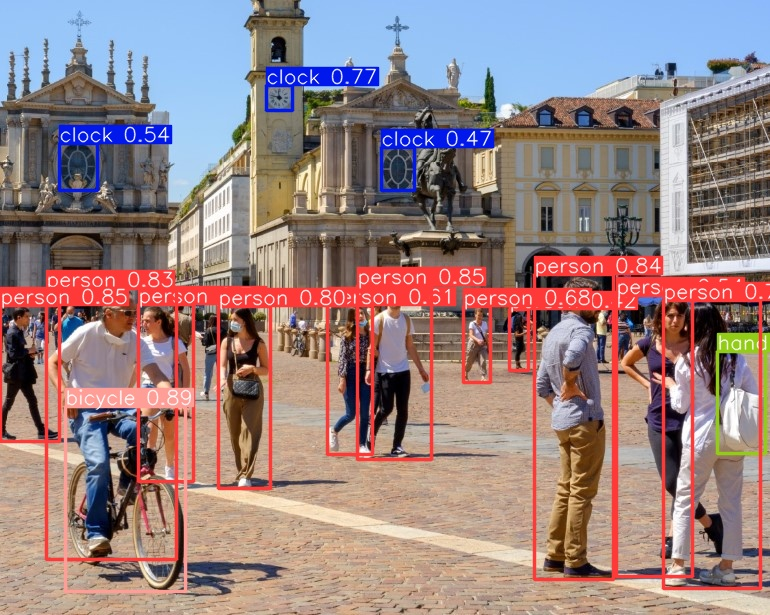

In [10]:
resultado = cv2.imread('/content/runs/detect/predict3/italia.jpg')
cv2_imshow(resultado)

In [11]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.57 source='italia.jpg' save=True

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/italia.jpg: 512x640 9 persons, 1 bicycle, 1 clock, 101.6ms
Speed: 4.0ms preprocess, 101.6ms inference, 1964.2ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


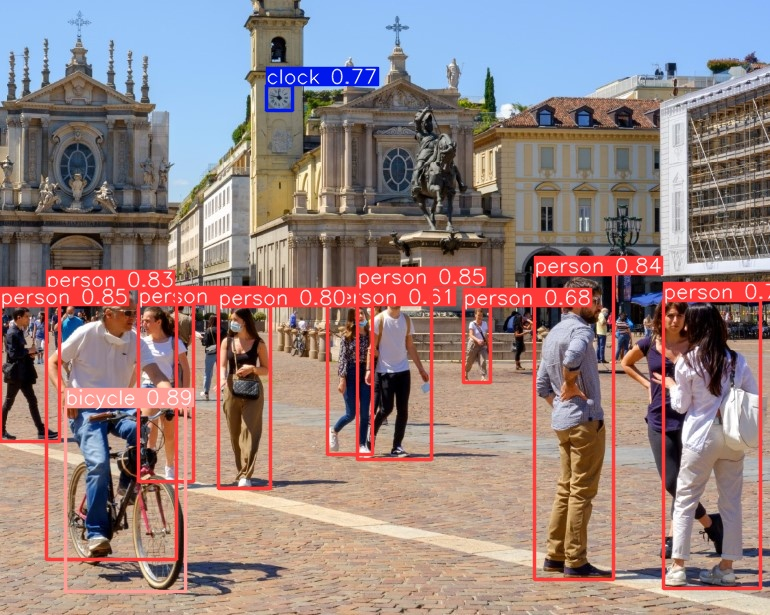

In [12]:
resultado = cv2.imread('/content/runs/detect/predict4/italia.jpg')
cv2_imshow(resultado)

In [13]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/content/PessoasMetro.jpg' save=True

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/PessoasMetro.jpg: 448x640 7 persons, 1 train, 162.2ms
Speed: 10.9ms preprocess, 162.2ms inference, 2062.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


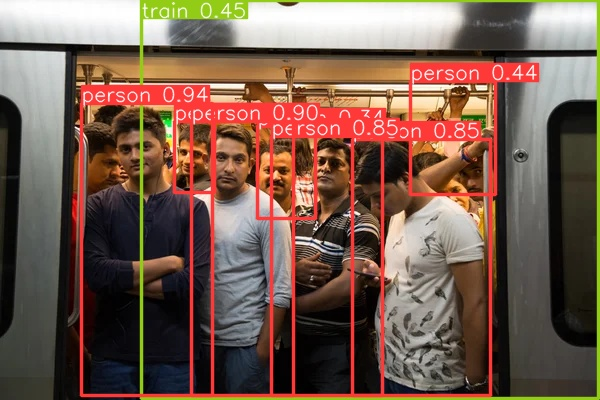

In [14]:
resultado = cv2.imread('/content/runs/detect/predict5/PessoasMetro.jpg')
cv2_imshow(resultado)